In [78]:
import yfinance as yf
import pandas as pd 
import numpy as np
import math 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [101]:
forex_data = yf.download('EURUSD=X',start='2018-01-02', end='2021-9-01')
forex_data.index = pd.to_datetime(forex_data.index)

[*********************100%***********************]  1 of 1 completed


In [102]:
forex_data.shape


(955, 6)

In [103]:
plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

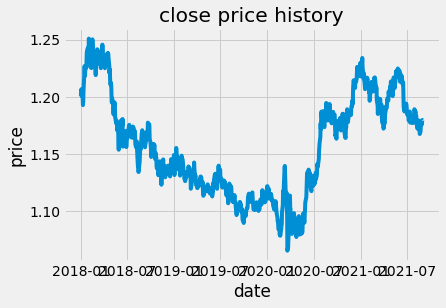

In [104]:

plt.title('close price history')

plt.plot(forex_data['Close'])
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [106]:
data = forex_data.filter(['Close'])
dateset = data.values

In [107]:
training_date_len = math.ceil(len(dateset)*0.8)
training_date_len

764

In [108]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dateset)

In [109]:
scaled_data

array([[0.730966  ],
       [0.75896629],
       [0.73034314],
       [0.76187339],
       [0.7449359 ],
       [0.70876962],
       [0.6865713 ],
       [0.70104438],
       [0.74743956],
       [0.8285108 ],
       [0.86960654],
       [0.87115017],
       [0.82402082],
       [0.85242776],
       [0.86262706],
       [0.86303243],
       [0.89218706],
       [0.93582442],
       [0.93648782],
       [0.95577388],
       [0.93044198],
       [0.94578435],
       [0.95069258],
       [1.        ],
       [0.96596031],
       [0.9232508 ],
       [0.93052498],
       [0.86944439],
       [0.86546595],
       [0.86116772],
       [0.8886719 ],
       [0.91566391],
       [0.97693303],
       [0.99653825],
       [0.94703136],
       [0.9398878 ],
       [0.9057117 ],
       [0.87684469],
       [0.90103318],
       [0.8796958 ],
       [0.89505105],
       [0.84903486],
       [0.82794907],
       [0.87090695],
       [0.89496933],
       [0.90636866],
       [0.9496103 ],
       [0.948

In [110]:
# create training dateset
train_data = scaled_data[0:training_date_len,:]
x_train=[]
y_train=[]
for i in range (60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.730966  , 0.75896629, 0.73034314, 0.76187339, 0.7449359 ,
       0.70876962, 0.6865713 , 0.70104438, 0.74743956, 0.8285108 ,
       0.86960654, 0.87115017, 0.82402082, 0.85242776, 0.86262706,
       0.86303243, 0.89218706, 0.93582442, 0.93648782, 0.95577388,
       0.93044198, 0.94578435, 0.95069258, 1.        , 0.96596031,
       0.9232508 , 0.93052498, 0.86944439, 0.86546595, 0.86116772,
       0.8886719 , 0.91566391, 0.97693303, 0.99653825, 0.94703136,
       0.9398878 , 0.9057117 , 0.87684469, 0.90103318, 0.8796958 ,
       0.89505105, 0.84903486, 0.82794907, 0.87090695, 0.89496933,
       0.90636866, 0.9496103 , 0.94852866, 0.89022519, 0.89136924,
       0.90801138, 0.93648782, 0.9274641 , 0.89161504, 0.87627523,
       0.90653274, 0.86068191, 0.91237074, 0.90013107, 0.91599335])]
[0.9716516089096965]

[array([0.730966  , 0.75896629, 0.73034314, 0.76187339, 0.7449359 ,
       0.70876962, 0.6865713 , 0.70104438, 0.74743956, 0.8285108 ,
       0.86960654, 0.87115017, 0.824

In [111]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(704, 60)

In [112]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(704, 60, 1)

In [113]:
# build lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [114]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [115]:
# train model
model.fit(x_train,y_train,batch_size=1,epochs=1)

704/704 [==============================] - 18s 20ms/step - loss: 0.0055


In [116]:
test_data = scaled_data[training_date_len - 60:,:]
x_test = []
y_test=dateset[training_date_len:,:]

In [117]:
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [118]:
x_test= np.array(x_test)

In [119]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [120]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


6/6 [==============================] - 1s 16ms/step


In [121]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.005325236869732123

C:\Users\RAYANS~1\AppData\Local\Temp/ipykernel_11220/1236458089.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


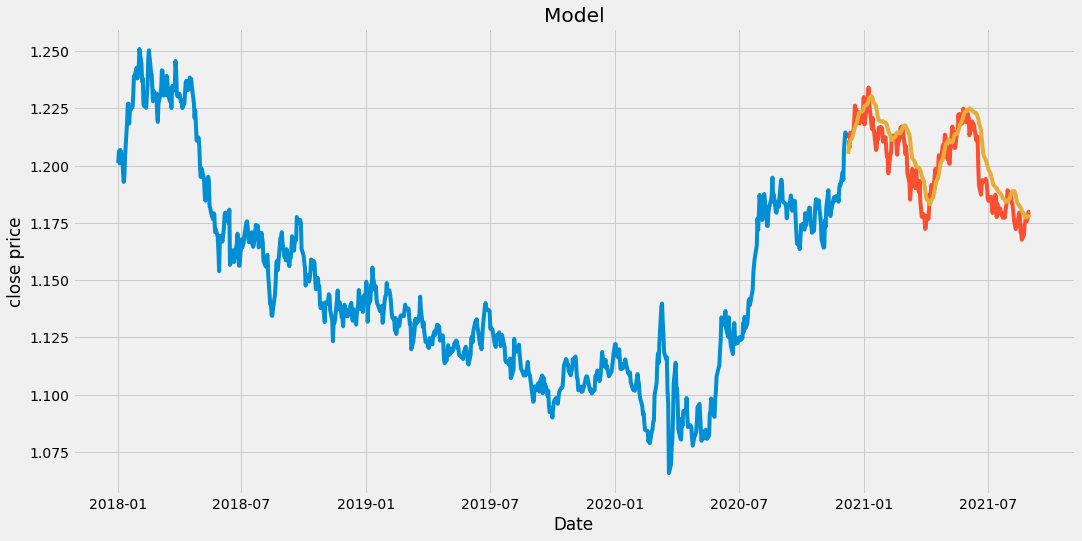

In [122]:
train = data[:training_date_len]
valid = data[training_date_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('close price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
# plt.legend(['Train','Val','Predictions'],loc = 'lower right ')

In [100]:
valid

,Close,Predictions
Date,,
2021-01-01,1.218027,1.216060
2021-01-04,1.225070,1.216269
2021-01-05,1.225160,1.216671
2021-01-06,1.230027,1.217101
2021-01-07,1.234111,1.217978
...,...,...
2021-09-24,1.174026,1.173784
2021-09-27,1.172305,1.172853
2021-09-28,1.169680,1.172143
